In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  #this is necessary only for imbalance to balance conversion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score # indivisul presentation
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("F:/Python/Ostad Python/Jupyter notebook/Churn_Modelling.csv")
df.head()               

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [13]:
print(df["Gender"].unique())

['Female' 'Male']


In [38]:
Label_Encoder=LabelEncoder()
df['Gender']=Label_Encoder.fit_transform(df['Gender'])
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [40]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [34]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

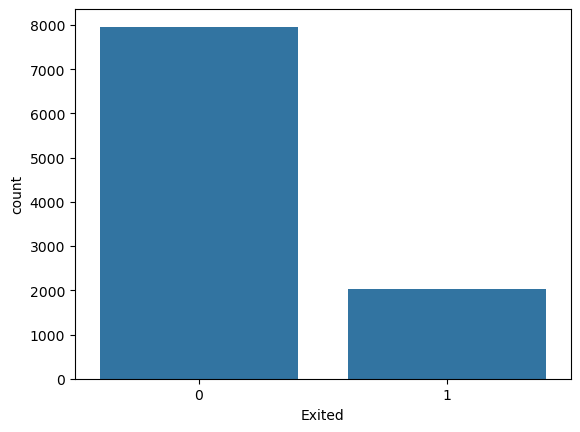

In [36]:
sns.countplot(x='Exited', data=df)#0 means not Exited and 1 means exited

In [42]:
feature=['CreditScore','Gender','Age','Tenure',	'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']
x=df[feature]
y=df['Exited']

In [44]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [46]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [29]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2, random_state=42)

In [50]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)  # Use transform, not fit_transform

In [52]:
x_train[:5],x_test[:5]

(array([[ 0.84254148, -0.84156567,  0.60865604,  1.17583927, -1.34412435,
         -0.72987351, -1.28485528, -0.76534993,  1.15750526, -0.75981466,
          1.56786403],
        [ 1.08378799,  1.1882614 ,  0.10654653, -1.39083179,  0.77210697,
          1.0312228 , -1.28485528,  1.30659187,  0.74796208, -0.75981466,
         -0.63781041],
        [-0.55010884, -0.84156567, -0.59640677,  0.44250468,  1.20681355,
          1.0312228 ,  0.77829777, -0.76534993,  1.5767297 ,  1.31611044,
          1.56786403],
        [ 0.08590469, -0.84156567,  1.41203125,  1.17583927,  0.60172158,
         -0.72987351, -1.28485528,  1.30659187,  0.32846732,  1.31611044,
         -0.63781041],
        [ 0.06397319, -0.84156567,  0.50823414,  0.07583739,  0.50509144,
          1.0312228 ,  0.77829777,  1.30659187,  0.66633164, -0.75981466,
         -0.63781041]]),
 array([[-1.26288262, -0.84156567, -1.19893818,  0.07583739, -1.34412435,
          1.0312228 , -1.28485528,  1.30659187, -0.83312052, -0.75981

In [54]:
# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred1 = rf_model.predict(x_test)
# Evaluate the model

accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)
print('Classification Report:\n', classification_report(y_test, y_pred1))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred1))
print('Precision Score:',precision_score(y_test, y_pred1))
print('recall Score:',recall_score(y_test, y_pred1))
print('f1 Score:',f1_score(y_test, y_pred1))

Accuracy: 0.8785310734463276
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1633
           1       0.87      0.88      0.88      1553

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186

Confusion Matrix:
 [[1429  204]
 [ 183 1370]]
Precision Score: 0.8703939008894537
recall Score: 0.8821635544108177
f1 Score: 0.8762392069075792


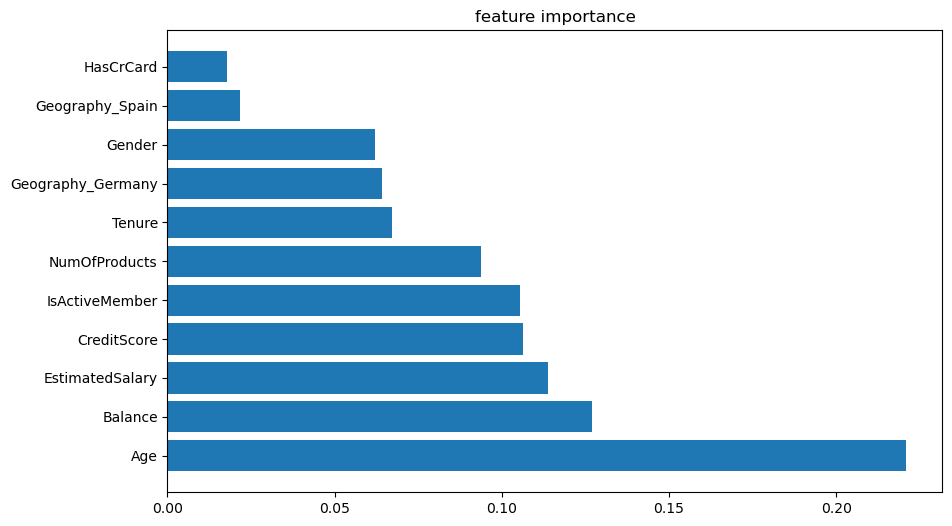

In [58]:
importance=rf_model.feature_importances_
indices=np.argsort(importance)[::-1]
names=[feature[i]for i in indices]
plt.figure(figsize=(10,6))
plt.title("feature importance")
plt.barh(range(x.shape[1]),importance[indices])
plt.yticks(range(x.shape[1]),names)
plt.show()

In [60]:
from sklearn.linear_model import LogisticRegression
# Initialize the model
log_reg = LogisticRegression(random_state=42)
# Train the model
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [62]:
# Make predictions
y_pred2 = log_reg.predict(x_test)

accuracy2 = accuracy_score(y_test, y_pred2)

print("Accuracy:", accuracy2)
print('Classification Report:\n', classification_report(y_test, y_pred2))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred2))
print('Precision Score:',precision_score(y_test, y_pred2))
print('recall Score:',recall_score(y_test, y_pred2))
print('f1 Score:',f1_score(y_test, y_pred2))

Accuracy: 0.7859384808537351
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1633
           1       0.78      0.79      0.78      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186

Confusion Matrix:
 [[1282  351]
 [ 331 1222]]
Precision Score: 0.7768595041322314
recall Score: 0.7868641339343206
f1 Score: 0.781829814459373


In [64]:
from sklearn.svm import SVC
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)
# Train the model
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Predict on the test set
y_pred3 = svm_model.predict(x_test)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)
class_report = classification_report(y_test, y_pred3)

print("Accuracy:", accuracy3)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print('Precision Score:',precision_score(y_test, y_pred3))
print('recall Score:',recall_score(y_test, y_pred3))
print('f1 Score:',f1_score(y_test, y_pred3))

Accuracy: 0.7875078468298807
Confusion Matrix:
 [[1287  346]
 [ 331 1222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1633
           1       0.78      0.79      0.78      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186

Precision Score: 0.7793367346938775
recall Score: 0.7868641339343206
f1 Score: 0.7830823454021147


In [68]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred4 = knn_model.predict(x_test)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred4)
conf_matrix = confusion_matrix(y_test, y_pred4)
class_report = classification_report(y_test, y_pred4)

print("Accuracy:", accuracy4)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print('Precision Score:',precision_score(y_test, y_pred4))
print('recall Score:',recall_score(y_test, y_pred4))
print('f1 Score:',f1_score(y_test, y_pred4))

Accuracy: 0.8330194601381042
Confusion Matrix:
 [[1341  292]
 [ 240 1313]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1633
           1       0.82      0.85      0.83      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186

Precision Score: 0.8180685358255452
recall Score: 0.845460399227302
f1 Score: 0.83153894870171


In [72]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbc_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred5 = gbc_model.predict(x_test)

# Evaluate the model
accuracy5 = accuracy_score(y_test, y_pred5)
conf_matrix = confusion_matrix(y_test, y_pred5)
class_report = classification_report(y_test, y_pred5)

print("Accuracy:", accuracy5)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print('Precision Score:',precision_score(y_test, y_pred5))
print('recall Score:',recall_score(y_test, y_pred5))
print('f1 Score:',f1_score(y_test, y_pred5))

Accuracy: 0.8565599497802887
Confusion Matrix:
 [[1393  240]
 [ 217 1336]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1633
           1       0.85      0.86      0.85      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186

Precision Score: 0.8477157360406091
recall Score: 0.8602704443013522
f1 Score: 0.8539469479066795


In [76]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(x_train, y_train)
y_pred6 = clf.predict(x_test)

In [78]:
# Evaluate the model
accuracy6 = accuracy_score(y_test, y_pred6)
conf_matrix = confusion_matrix(y_test, y_pred6)
class_report = classification_report(y_test, y_pred6)

print("Accuracy:", accuracy6)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print('Precision Score:',precision_score(y_test, y_pred6))
print('recall Score:',recall_score(y_test, y_pred6))
print('f1 Score:',f1_score(y_test, y_pred6))

Accuracy: 0.817639673571877
Confusion Matrix:
 [[1364  269]
 [ 312 1241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1633
           1       0.82      0.80      0.81      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186

Precision Score: 0.8218543046357616
recall Score: 0.7990985189954926
f1 Score: 0.8103166829905322


In [82]:
#Fine-Tuning Steps
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'max_features': ['sqrt', 'log2',None]
}
# Use RandomizedSearchCV for a randomized search
grid_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    n_iter=10  # Adjust the number of iterations to control the randomness
)
# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters from Grid Search:", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters from Grid Search: {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.2}


In [85]:
# Use the best model from grid search
best_model = grid_search.best_estimator_  # or random_search.best_estimator_ if using RandomizedSearchCV

# Predict on the test set
y_pred = best_model.predict(x_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Tuned Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Tuned Model Accuracy: 0.8816698053986189
Confusion Matrix:
 [[1415  218]
 [ 159 1394]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      1633
           1       0.86      0.90      0.88      1553

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



In [88]:
final_data=pd.DataFrame({'Model':['RFC','LR','SVC','KNC','GBC','DTC'],
                         'Accuracy':[accuracy_score(y_test, y_pred1),
                                     accuracy_score(y_test, y_pred2),
                                     accuracy_score(y_test, y_pred3),
                                    accuracy_score(y_test, y_pred4),
    accuracy_score(y_test, y_pred5),
    accuracy_score(y_test, y_pred6)]
    ,'precision':[precision_score(y_test, y_pred1),
    precision_score(y_test, y_pred2),
    precision_score(y_test, y_pred3),
    precision_score(y_test, y_pred4),
    precision_score(y_test, y_pred5),
    precision_score(y_test, y_pred6)],
    'recalls':[
    recall_score(y_test, y_pred1),
    recall_score(y_test, y_pred2),
    recall_score(y_test, y_pred3),
    recall_score(y_test, y_pred4),
    recall_score(y_test, y_pred5),
    recall_score(y_test, y_pred6)
]})

In [90]:
print(final_data)

  Model  Accuracy  precision   recalls
0   RFC  0.878531   0.870394  0.882164
1    LR  0.785938   0.776860  0.786864
2   SVC  0.787508   0.779337  0.786864
3   KNC  0.833019   0.818069  0.845460
4   GBC  0.856560   0.847716  0.860270
5   DTC  0.817640   0.821854  0.799099


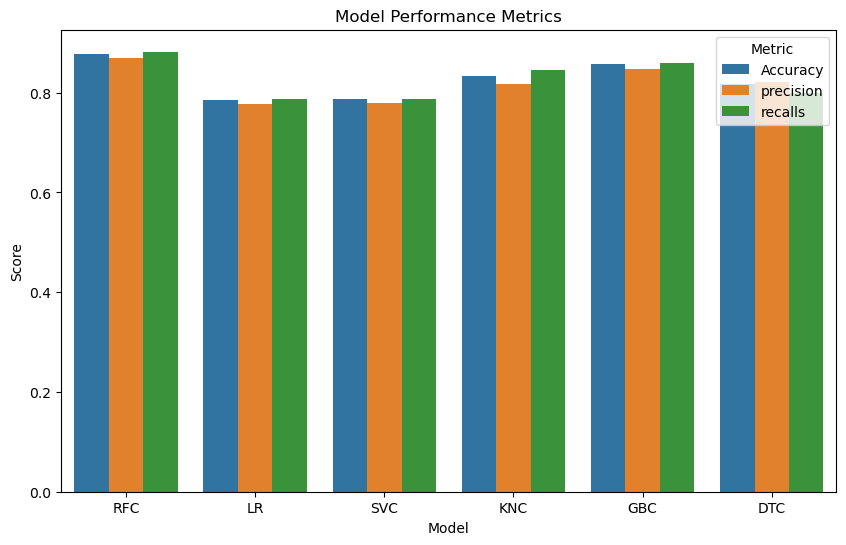

In [96]:
# Melt the DataFrame
final_data1 = pd.melt(final_data, id_vars=['Model'], value_vars=['Accuracy', 'precision', 'recalls'],
                    var_name='Metric', value_name='Score')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=final_data1)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend(title='Metric')

# Show plot
plt.show()

### Follow this steps ,As RFC is best model where accuracy is high

In [98]:
x_res = scaler.fit_transform(x_res)

In [100]:
rf_model.fit(x_res,y_res)

RandomForestClassifier(random_state=42)

In [124]:
import joblib
joblib.dump(rf_model, 'Churn_Prediction_Model')
#model=joblib.load('Churn_Prediction_Model')

['Churn_Prediction_Model']

In [128]:
df[feature].columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [141]:
New_input_data = scaler.transform([[660, 0, 55, 2, 20000, 1, 0, 0, 80000, 0, 0]])
rf_model.predict(New_input_data) ## use this formula because for Maximum Accuracy of the model

array([1], dtype=int64)